<p align="center">
<img src="https://cdn.datacamp.com/main-app/assets/brand/datacamp-horizontal-rgb-b641f95b7bdd7560b554c761a0b4910f9619907dd823c0e41244ed72078723bf.svg" alt = "DataCamp icon" width="50%">
</p>
<br><br>

# **How to transition from Spreadsheets to Python**


Welcome to this live, hands-on training where you will learn how to upgrade from being a spreadsheet user to using Python. 

In most organizations across all industries, data fluency, technical skills and a data-driven mindset are becoming sought after skills that drive organizational success in the digital age. This shift has spurred on the adoption of tools that go beyond spreadsheets, which allow for more robust data analysis, visualization and presentation. In this notebook, you will learn:

* How to import Excel files into `pandas`.
* Filter, add new columns, and explore DataFrames.
* Apply common spreadsheets operations such as pivot tables and VLOOKUP in Python.
* Present data as visualizations using `matplotlib` and `seaborn`.

The dataset to be used in this webinar is an Excel file named `sales_data_dirty.xlsx` - it contains 4 sheets, each containing the following columns:

<br>



![alt](https://github.com/adelnehme/test/blob/master/image.png?raw=true)

## **Getting started with the dataset**

In [0]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Import the data
data = pd.ExcelFile('https://github.com/adelnehme/test/blob/master/sales_data_dirty.xlsx?raw=true')

In [0]:
# Print the name of the sheets
data.sheet_names

['sales', 'customers', 'dates', 'employees']

In [0]:
# Parse sales data
sales = data.parse('sales')
# Print dimensions and glimpse
print(sales.shape)
sales.head(5)

(31465, 5)


,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
0,43659,23153.2339,12,0,5
1,43660,1457.3288,2,0,5
2,43661,36865.8012,15,0,5
3,43662,32474.9324,22,0,5
4,43663,472.3108,1,0,5


In [0]:
# Parse customers data 
customers = data.parse('customers')
# Print dimensions and glimpse
print(customers.shape)
customers.head(5)

(31465, 6)


,SalesOrderID,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType
0,43659,NaN,NaN,Tsvi,Reiter,NaN
1,43660,NaN,NaN,Tsvi,Reiter,NaN
2,43661,NaN,NaN,José,Saraiva,NaN
3,43662,NaN,NaN,José,Saraiva,NaN
4,43663,NaN,NaN,Linda,Mitchell,NaN


***Insight:*** There is missing data for `CustomerFirstName`, `CustomerLastName`, `EmployeeFirstName`, `EmployeeLastName` and `ChannelType` - we need to better understand the mechanisms of why this data is missing and how to best approach it.

In [0]:
# Parse dates data
dates = data.parse('dates')
# Print dimensions and glimpse
print(dates.shape)
dates.head(5)

(31465, 3)


,SalesOrderID,OrderDate,ShipDate
0,43659,2011-05-31 00:00:00,2011-06-07 00:00:00
1,43660,2011-05-31 00:00:00,2011-06-07 00:00:00
2,43661,2011-05-31 00:00:00,2011-06-07 00:00:00
3,43662,2011-05-31 00:00:00,2011-06-07 00:00:00
4,43663,2011-05-31 00:00:00,2011-06-07 00:00:00


In [0]:
# Parse employees data
employees = data.parse('employees')
# Print dimensions and glimpse
print(employees.shape)
employees.head(5)

(17, 5)


,FirstName,LastName,CountryCode,RegionName,CommissionPct
0,Amy,Alberts,GB,United Kingdom,0.000
1,David,Campbell,US,Northwest,0.012
2,Garrett,Vargas,CA,Canada,0.010
3,Jae,Pak,CA,Canada,0.020
4,Jillian,Carson,US,Southwest,0.015


## **Better understanding our data**

In [0]:
# Understand missingness of sales data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 5 columns):
SalesOrderID       31465 non-null int64
TotalDue           31465 non-null float64
NumberofItems      31465 non-null int64
OnlineOrderFlag    31465 non-null int64
Status             31465 non-null int64
dtypes: float64(1), int64(4)
memory usage: 1.2 MB


***Insight:*** There is no missing data or nothing out of the ordinary in this dataset so far. Let's dig deeper.

In [0]:
# Understand distribution of sales data
sales.describe()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
count,31465.000000,31465.000000,31465.000000,31465.000000,31465.0
mean,59391.000000,3915.995109,3.855617,0.879040,5.0
std,9083.307446,12515.462713,7.214877,0.326086,0.0
min,43659.000000,1.518300,1.000000,0.000000,5.0
25%,51525.000000,62.951900,1.000000,1.000000,5.0
50%,59391.000000,865.204000,2.000000,1.000000,5.0
75%,67257.000000,2615.490800,3.000000,1.000000,5.0
max,75123.000000,187487.825000,72.000000,1.000000,5.0


***Insight:*** Taking a look at the `Status` column, we notice that the minimum, maximmum, mean are the same, meaning there's no variability in that column. The `OnlineOrderFlag` column seems to be binary 1,0.

In [0]:
# Make sure Status column has no other unique values
print("Unique values of Status:", sales['Status'].unique())
print("Unique values of OnlineOrderFlag:", sales['OnlineOrderFlag'].unique())

Unique values of Status: [5]
Unique values of OnlineOrderFlag: [0 1]


In [0]:
# Understand column types of dates and missingness
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
SalesOrderID    31465 non-null int64
OrderDate       31465 non-null object
ShipDate        31465 non-null object
dtypes: int64(1), object(2)
memory usage: 737.6+ KB


If we look at the OrderDate and ShipDate columns - they are objects not datetimes - we should probably convert them to datetime to be able to do properly manipulate date values.

In [0]:
# Let's understand the degree of missingness in customers dataset
customers.info()
# How to find missing values?
customers.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 6 columns):
SalesOrderID         31465 non-null int64
CustomerFirstName    17463 non-null object
CustomerLastName     17463 non-null object
EmployeeFirstName    3806 non-null object
EmployeeLastName     3806 non-null object
ChannelType          17463 non-null object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


SalesOrderID             0
CustomerFirstName    14002
CustomerLastName     14002
EmployeeFirstName    27659
EmployeeLastName     27659
ChannelType          14002
dtype: int64

A note on missing data

## Making our data ready for analysis

In [0]:
# Drop status column from sales
sales.drop('Status', axis = 1, inplace = True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 4 columns):
SalesOrderID       31465 non-null int64
TotalDue           31465 non-null float64
NumberofItems      31465 non-null int64
OnlineOrderFlag    31465 non-null int64
dtypes: float64(1), int64(3)
memory usage: 983.4 KB


In [0]:
# Replace OnlineOrderFlag to offline and online
sales['OnlineOrderFlag'] = sales['OnlineOrderFlag'].replace({0: "offline", 
                                                             1: "online"})
# Make sure it is the case
sales['OnlineOrderFlag'].unique()

array(['offline', 'online'], dtype=object)

In [0]:
# Convert data columns to datetime while keeping only Y,m,d
dates['OrderDate']= pd.to_datetime(dates['OrderDate'], format = '%Y-%m-%d') 
dates['ShipDate']= pd.to_datetime(dates['ShipDate'], format = '%Y-%m-%d') 

In [0]:
# Make sure now into datetime
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
SalesOrderID    31465 non-null int64
OrderDate       31465 non-null datetime64[ns]
ShipDate        31465 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 737.6 KB


In [0]:
# Replace PersonType current with B2C
customers['ChannelType'] = customers['ChannelType'].replace({"IN":"B2C"})

In [0]:
# Impute missing values based on key business assumptions
customers.loc[customers['CustomerFirstName'].isnull() 
              & customers['EmployeeFirstName'].isnull(), 'ChannelType'] = "B2C"


customers.loc[customers['CustomerFirstName'].isnull() 
              & customers['EmployeeFirstName'].notnull(), 'ChannelType'] = "B2B"

In [0]:
# Make sure no more missing data in persontype
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 6 columns):
SalesOrderID         31465 non-null int64
CustomerFirstName    17463 non-null object
CustomerLastName     17463 non-null object
EmployeeFirstName    3806 non-null object
EmployeeLastName     3806 non-null object
ChannelType          31465 non-null object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [0]:
# Combine first and last name in employees dataset
employees['EmployeeFullName'] = employees['FirstName'] + ' ' + employees['LastName']
employees.head()

,FirstName,LastName,CountryCode,RegionName,CommissionPct,EmployeeFullName
0,Amy,Alberts,GB,United Kingdom,0.000,Amy Alberts
1,David,Campbell,US,Northwest,0.012,David Campbell
2,Garrett,Vargas,CA,Canada,0.010,Garrett Vargas
3,Jae,Pak,CA,Canada,0.020,Jae Pak
4,Jillian,Carson,US,Southwest,0.015,Jillian Carson


## Case Study:
### How did we do in revenue over the years?

In [0]:
# Merge data - the VLOOKUP of Excel
sales_date = sales.merge(dates, on="SalesOrderID", how = "left")
sales_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07
4,43663,472.3108,1,offline,2011-05-31,2011-06-07


In [0]:
# Create column for year and month
sales_date['Order_Year'] = sales_date['OrderDate'].dt.year
sales_date['Order_YM'] = sales_date['OrderDate'].dt.strftime('%Y-%m')

In [0]:
# Extract revenue by year
sales_by_year = sales_date.groupby('Order_Year').sum().reset_index()
sales_by_year.head()

,Order_Year,SalesOrderID,TotalDue,NumberofItems
0,2011,71450434,1.415570e+07,5716
1,2012,184878045,3.767570e+07,21689
2,2013,798042413,4.896589e+07,56573
3,2014,814366923,2.241950e+07,37339


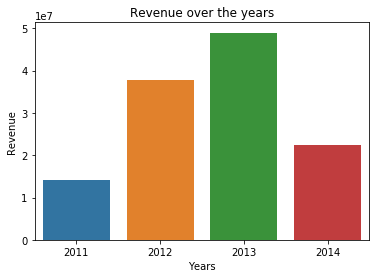

In [0]:
# Visualize it
sns.barplot(x = 'Order_Year', y = 'TotalDue', data = sales_by_year)
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.title("Revenue over the years")
plt.show()

In [0]:
# Is there seasonality?
sales_by_year_month = sales_date.groupby('Order_YM').sum().reset_index()
sales_by_year_month.head()

,Order_YM,SalesOrderID,TotalDue,NumberofItems,Order_Year
0,2011-05,1878240,5.670209e+05,357,86473
1,2011-06,6171852,5.070965e+05,141,283551
2,2011-07,10154298,2.292183e+06,941,464541
3,2011-08,11049625,2.800576e+06,1242,502750
4,2011-09,6971114,5.547916e+05,157,315727


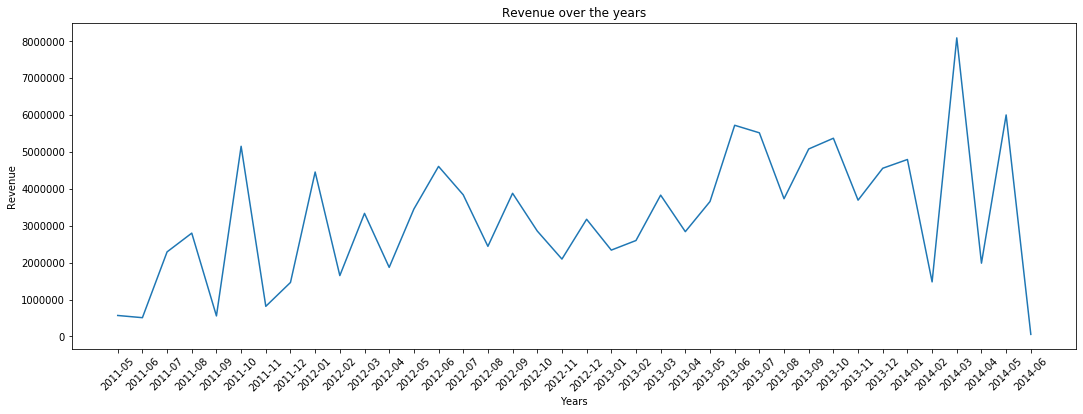

In [0]:
# Visualize it
## Line chart instead of barplot
plt.figure(figsize=(18, 6))
sns.lineplot(x = 'Order_YM', y = 'TotalDue', data = sales_by_year_month)
plt.xlabel("Years")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.title("Revenue over the years")
plt.show()

## How are our revenue divided by channel type?

In [0]:
# Merge sales and customer data
sales_customers = sales.merge(customers, on = "SalesOrderID", how = "left")
sales_customers.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType
0,43659,23153.2339,12,offline,NaN,NaN,Tsvi,Reiter,B2B
1,43660,1457.3288,2,offline,NaN,NaN,Tsvi,Reiter,B2B
2,43661,36865.8012,15,offline,NaN,NaN,José,Saraiva,B2B
3,43662,32474.9324,22,offline,NaN,NaN,José,Saraiva,B2B
4,43663,472.3108,1,offline,NaN,NaN,Linda,Mitchell,B2B


In [0]:
# Identify revenue and amount sold by channel
sales_by_channel = sales_customers.groupby('ChannelType').sum().reset_index()
sales_by_channel.head()

,ChannelType,SalesOrderID,TotalDue,NumberofItems
0,B2B,204462343,9.077545e+07,60919
1,B2C,1664275472,3.244134e+07,60398


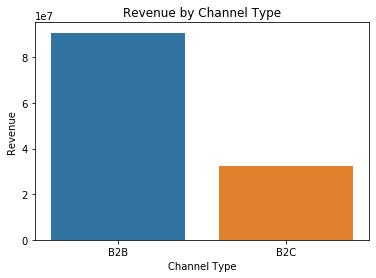

In [0]:
# Visualize
sns.barplot(x = 'ChannelType', y = 'TotalDue', data = sales_by_channel)
plt.xlabel("Channel Type")
plt.ylabel("Revenue")
plt.title("Revenue by Channel Type")
plt.show()

Is there a temporal dimension to this?

In [0]:
# Merge sales and customer data
sales_customers_date = sales_date.merge(customers, on = "SalesOrderID", how = "left")
sales_customers_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,Order_YM,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B
4,43663,472.3108,1,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Linda,Mitchell,B2B


In [0]:
# Group by year by channel type
sales_by_channel_date = sales_customers_date.groupby(['Order_Year', 'ChannelType']).sum().reset_index()
sales_by_channel_date.head()

,Order_Year,ChannelType,SalesOrderID,TotalDue,NumberofItems
0,2011,B2B,17999103,9.886952e+06,4515
1,2011,B2C,53451331,4.268748e+06,1201
2,2012,B2B,55440422,3.061409e+07,18946
3,2012,B2C,129437623,7.061613e+06,2743
4,2013,B2B,87767978,3.710689e+07,27614


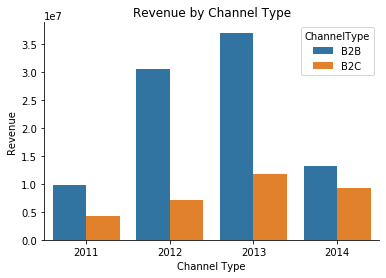

In [0]:
# Visualize
sns.barplot(x = 'Order_Year', y = 'TotalDue', hue = "ChannelType",
            data = sales_by_channel_date, ci = None)
plt.xlabel("Channel Type")
plt.ylabel("Revenue")
plt.title("Revenue by Channel Type")
sns.despine()
plt.show()

In [0]:
# Why is it that B2B > B2C?
sales_customers_date.groupby(['Order_Year', 'ChannelType']).mean().reset_index()

,Order_Year,ChannelType,SalesOrderID,TotalDue,NumberofItems
0,2011,B2B,44332.766010,24352.097596,11.120690
1,2011,B2C,44505.687760,3554.327978,1.000000
2,2012,B2B,47304.114334,26121.234848,16.165529
3,2012,B2C,47188.342326,2574.412348,1.000000
4,2013,B2B,54923.640801,23220.830371,17.280350
5,2013,B2C,56442.660124,942.387240,2.301256
6,2014,B2B,68658.476190,20900.827293,15.625397
7,2014,B2C,69276.083281,831.190111,2.470128


In [0]:
# Create new feature containing full names - MAKE SURE TO CREATE IT EARLIER
sales_customers_date['EmployeeFullName'] = sales_customers_date['EmployeeFirstName'] + ' ' + sales_customers_date['EmployeeLastName']
sales_customers_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,Order_YM,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,EmployeeFullName
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva
4,43663,472.3108,1,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell


In [0]:
# Group by employee performancee
sales_employees = sales_customers_date.groupby('EmployeeFullName').sum().reset_index()
sales_employees.head()

,EmployeeFullName,SalesOrderID,TotalDue,NumberofItems,Order_Year
0,Amy Alberts,2155978,8.264175e+05,586,78503
1,David Campbell,9966638,4.207895e+06,2247,380364
2,Garrett Vargas,12415186,4.069422e+06,3284,470937
3,Jae Pak,19195780,9.585125e+06,6738,700480
4,Jillian Carson,24928694,1.134239e+07,7825,951928


In [0]:
# Sort it so we visualize it correctly
sales_employees.sort_values('TotalDue', ascending=True, inplace = True)
sales_employees.head()

,EmployeeFullName,SalesOrderID,TotalDue,NumberofItems,Order_Year
14,Syed Abbas,964779,1.955288e+05,245,32212
0,Amy Alberts,2155978,8.264175e+05,586,78503
13,Stephen Jiang,2516344,1.235934e+06,792,96602
7,Lynn Tsoflias,6663235,1.606441e+06,1468,219460
10,Rachel Valdez,7870176,2.062393e+06,1783,261734


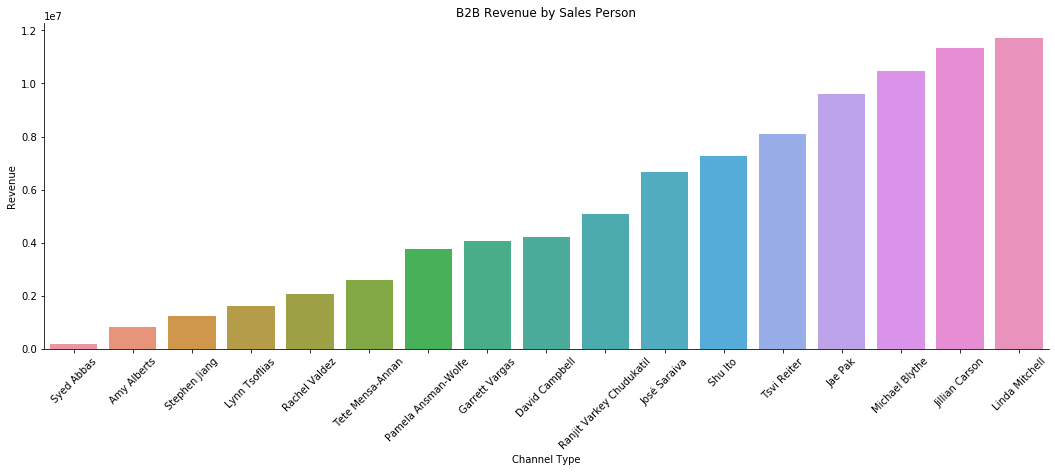

In [0]:
# Visualize
plt.figure(figsize=(18, 6))
sns.barplot(x = 'EmployeeFullName', y = 'TotalDue', data = sales_employees, ci = None)
plt.xlabel("Channel Type")
plt.xticks(rotation = 45)
plt.ylabel("Revenue")
plt.title("B2B Revenue by Sales Person")
sns.despine()
plt.show()

In [0]:
# So how did we do last year/
# Group by employee performancee
sales_employees = sales_customers_date.groupby(['EmployeeFullName', 'Order_Year']).sum().reset_index()
sales_employees.head()

,EmployeeFullName,Order_Year,SalesOrderID,TotalDue,NumberofItems
0,Amy Alberts,2012,335313,1.306670e+05,103
1,Amy Alberts,2013,1618710,6.320026e+05,453
2,Amy Alberts,2014,201955,6.374784e+04,30
3,David Campbell,2011,1242002,6.756637e+05,220
4,David Campbell,2012,2978792,1.453583e+06,741


In [0]:
# Sort to make it easier to visualize
sales_employees.sort_values(['Order_Year','TotalDue'], ascending=True, inplace = True)
sales_employees.head()

,EmployeeFullName,Order_Year,SalesOrderID,TotalDue,NumberofItems
45,Stephen Jiang,2011,176971,32567.9155,17
7,Garrett Vargas,2011,1329262,563326.5478,284
3,David Campbell,2011,1242002,675663.6940,220
32,Pamela Ansman-Wolfe,2011,974811,730273.4889,273
28,Michael Blythe,2011,2882387,986298.0902,623


In [0]:
# Who was the best last year?
sales_employees_2013 = sales_employees[sales_employees['Order_Year'] == 2013]

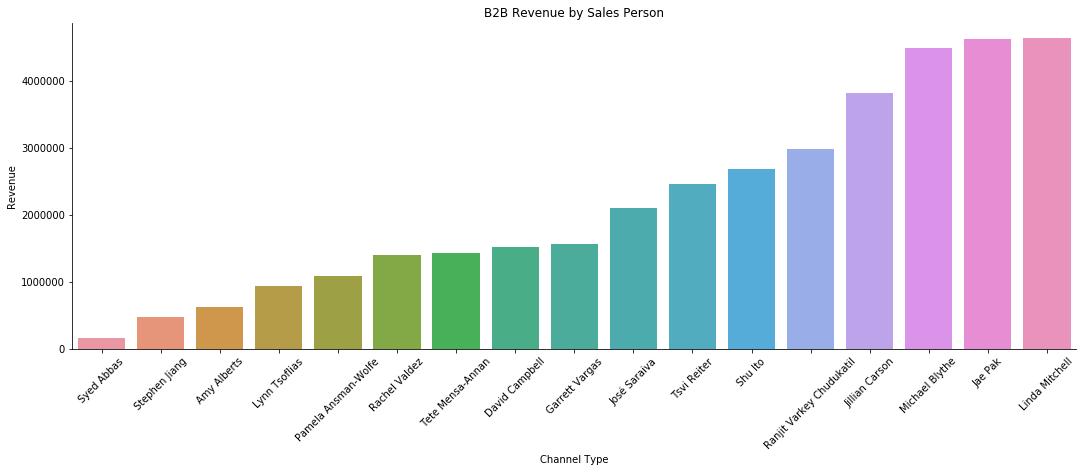

In [0]:
# Visualize
plt.figure(figsize=(18, 6))
sns.barplot(x = 'EmployeeFullName', y = 'TotalDue',
            data = sales_employees_2013, ci = None)
plt.xlabel("Channel Type")
plt.xticks(rotation = 45)
plt.ylabel("Revenue")
plt.title("B2B Revenue by Sales Person")
sns.despine()
plt.show()

Bonus Question: Calculate and visualize the comission earned by employees in 2012.

> Indented block

